## Airline Customer Satisfaction Prediction

Given *data about airline customers*, let's try to predict if a given customer will be **satisfied with the airline**.

We will use a logistic regression model to make our predictions, but first we will detect and remove outliers using z-scores.

Data source: https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('archive/Invistico_Airline.csv')
data

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

### Preprocessing

In [4]:
df = data.copy()

In [5]:
# Fill missing Arrival Delay in Minutes with column mean
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

In [6]:
df.isna().sum().sum()

np.int64(0)

In [7]:
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0


In [8]:
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'satisfaction': 2,
 'Gender': 2,
 'Customer Type': 2,
 'Type of Travel': 2,
 'Class': 3}

In [9]:
{column: df[column].unique() for column in df.select_dtypes('object').columns}

{'satisfaction': array(['satisfied', 'dissatisfied'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'Customer Type': array(['Loyal Customer', 'disloyal Customer'], dtype=object),
 'Type of Travel': array(['Personal Travel', 'Business travel'], dtype=object),
 'Class': array(['Eco', 'Business', 'Eco Plus'], dtype=object)}

In [10]:
# Binary encoding
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
df['Customer Type'] = df['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1})
df['Type of Travel'] = df['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1})

/tmp/ipykernel_13410/4277620265.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
/tmp/ipykernel_13410/4277620265.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Customer Type'] = df['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1})
/tmp/ipykernel_13410/4277620265.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(c

In [11]:
{column: df[column].unique() for column in df.select_dtypes('object').columns}

{'satisfaction': array(['satisfied', 'dissatisfied'], dtype=object),
 'Class': array(['Eco', 'Business', 'Eco Plus'], dtype=object)}

In [12]:
# One-hot encoding
flight_class_dummies = pd.get_dummies(df['Class'], prefix='Flight_Class', dtype=int)
df = pd.concat([df, flight_class_dummies], axis=1)
df = df.drop('Class', axis=1)

In [13]:
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Flight_Class_Business,Flight_Class_Eco,Flight_Class_Eco Plus
0,satisfied,0,1,65,0,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,0,1,0
1,satisfied,1,1,47,0,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,1,0,0
2,satisfied,0,1,15,0,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,0,1,0
3,satisfied,0,1,60,0,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,0,1,0
4,satisfied,0,1,70,0,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,0,0,29,0,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0,0,1,0
129876,dissatisfied,1,0,63,0,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0,1,0,0
129877,dissatisfied,1,0,69,0,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0,0,1,0
129878,dissatisfied,1,0,66,0,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0,0,1,0


#### Outlier Detection

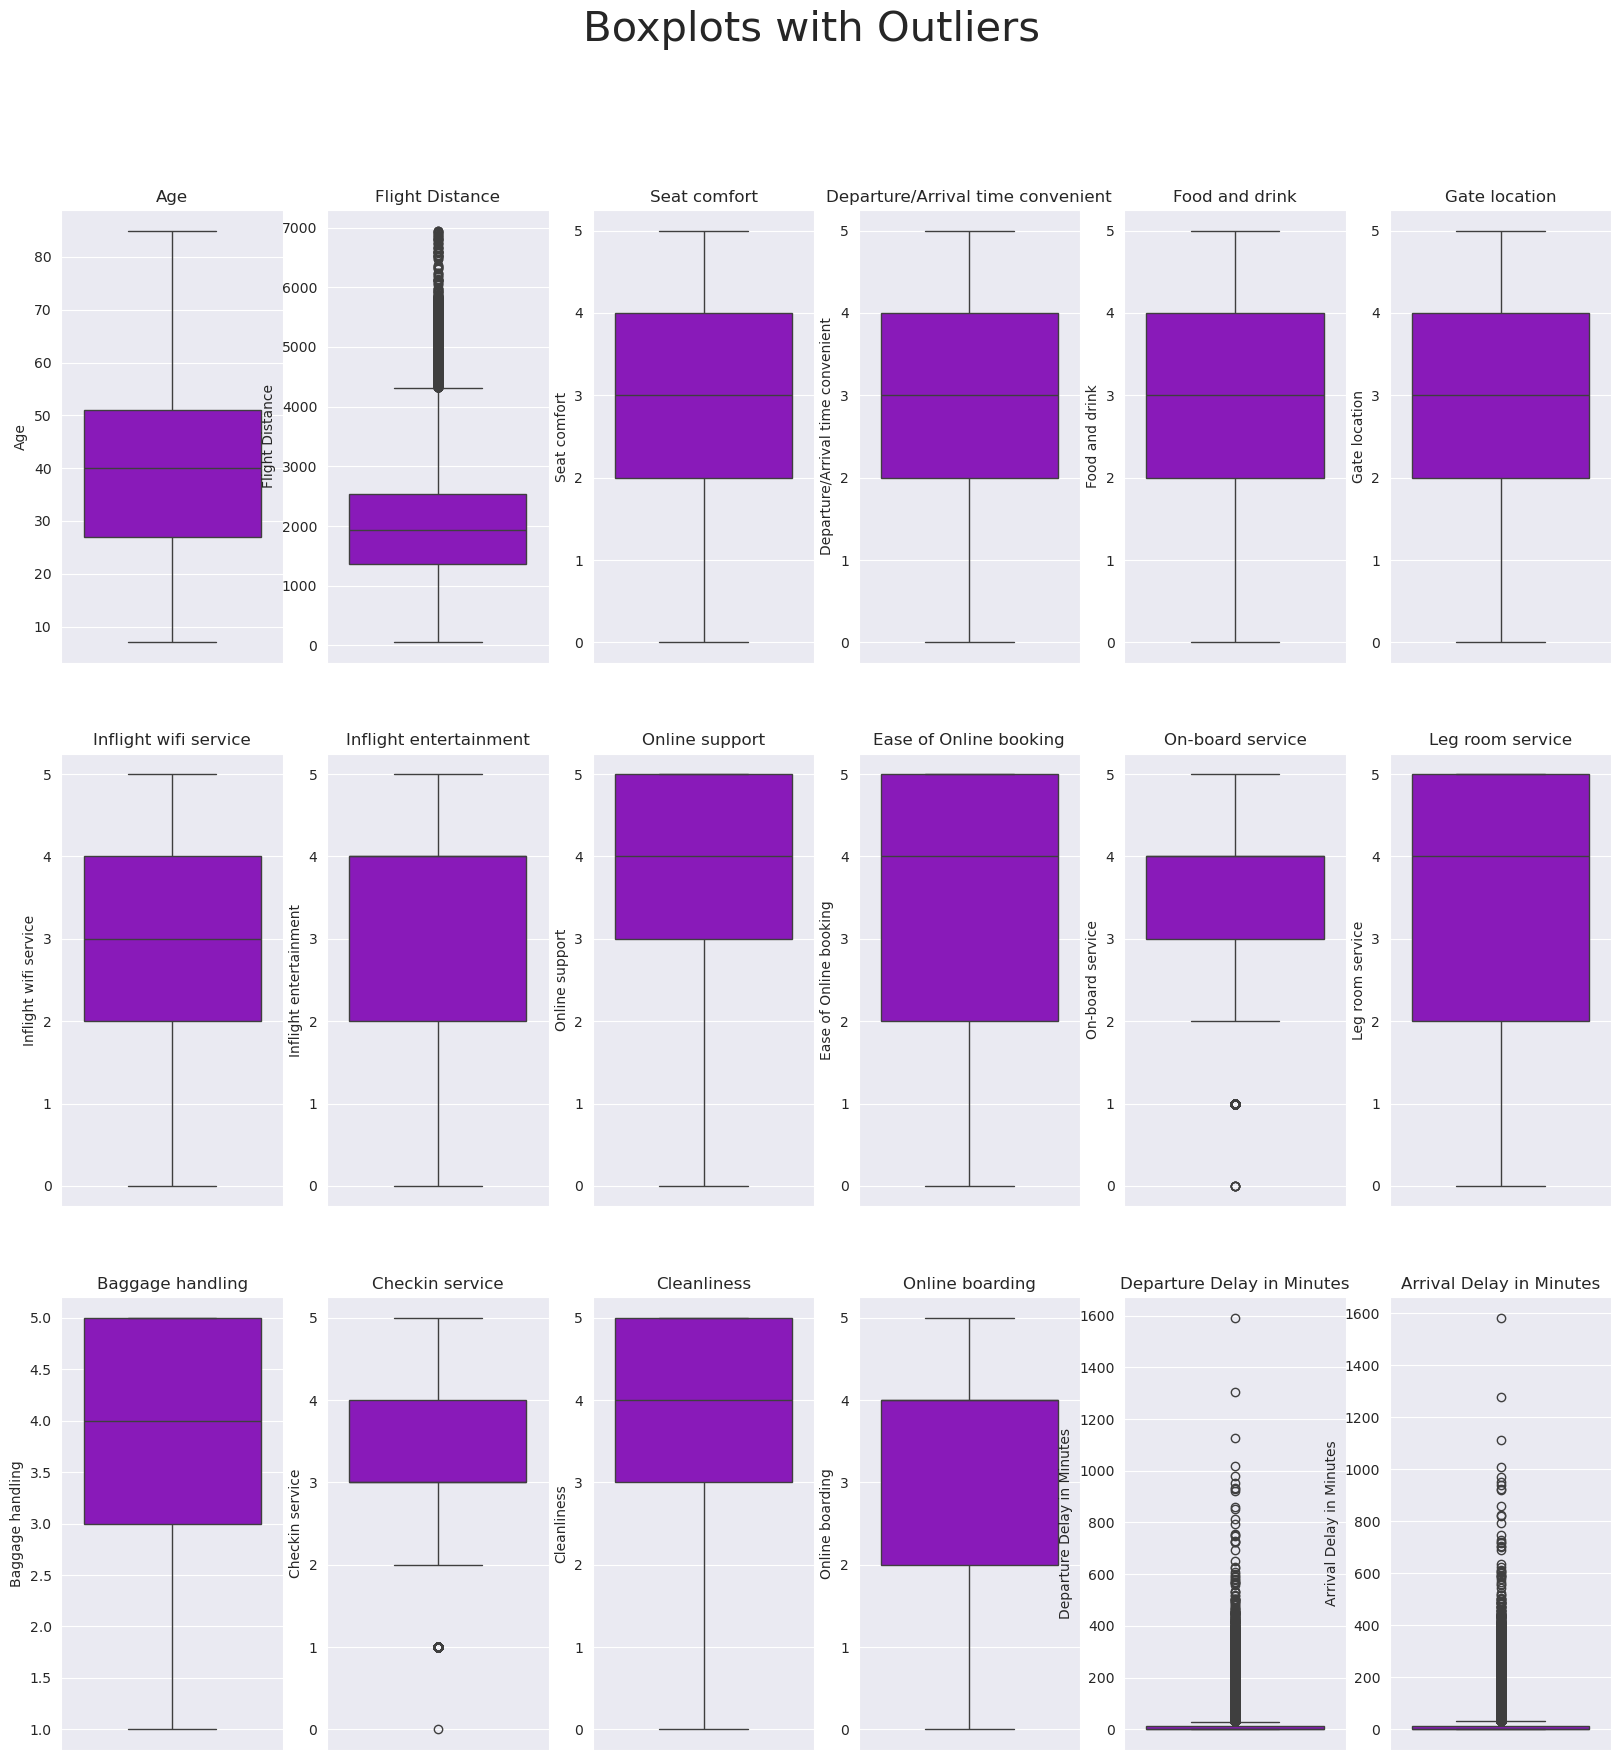

In [14]:
eda_df = df.drop('satisfaction', axis=1).copy()

non_binary_columns = [column for column in eda_df.columns if len(eda_df[column].unique()) > 2]

plt.figure(figsize=(20, 20))

for i, column in enumerate(non_binary_columns):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(data=eda_df[column], color='darkviolet')
    plt.title(column)

plt.suptitle('Boxplots with Outliers', size=30)
plt.show()

#### Outlier Removal

In [15]:
scipy.stats.zscore(df['Departure Delay in Minutes'], axis=0)

array([-0.38648106,  7.75620407, -0.38648106, ...,  3.6848615 ,
        4.6829971 ,  4.47286329], shape=(129880,))

In [16]:
threshold = 0.05

1 - threshold / 2

0.975

In [17]:
scipy.stats.norm.ppf(q=(threshold/2), loc=0, scale=1)

np.float64(-1.9599639845400545)

In [18]:
scipy.stats.norm.ppf(q=1 - (threshold/2), loc=0, scale=1)

np.float64(1.959963984540054)

In [19]:
def remove_outliers(df, columns, threshold):
    df = df.copy()
    # Calculate the lower and upper bounds on the Z distribution given a threshold value
    lower_bound = scipy.stats.norm.ppf(q=(threshold/2), loc=0, scale=1)
    upper_bound = scipy.stats.norm.ppf(q= 1 - (threshold/2), loc=0, scale=1)

    # Calculate z-scores of every example in the columns specified
    outlier_df = df.loc[:, columns].copy()
    zscores = pd.DataFrame(scipy.stats.zscore(outlier_df, axis=0), index=outlier_df.index, columns=outlier_df.columns)

    # Get boolean arrays denoting outlier examples
    lower_outliers = (zscores < lower_bound).any(axis=1)
    upper_outliers = (zscores >= upper_bound).any(axis=1)

    # Get indices of all outlier examples
    outliers = df[pd.concat([lower_outliers, upper_outliers], axis=1).any(axis=1)].index

    # Drop the outliers
    df = df.drop(outliers, axis=0).reset_index(drop=True)
    print(len(outliers), "examples dropped.")
    
    return df

In [20]:
outliers_df = remove_outliers(
    df = df,
    columns = [
        'On-board service', 
        'Checkin service', 
        'Departure Delay in Minutes',
        'Arrival Delay in Minutes',
        'Online boarding'
    ],
    threshold = 0.05
)

5867 examples dropped.


In [21]:
outliers_df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Flight_Class_Business,Flight_Class_Eco,Flight_Class_Eco Plus
0,satisfied,0,1,65,0,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.000000,0,1,0
1,satisfied,0,1,15,0,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.000000,0,1,0
2,satisfied,0,1,60,0,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.000000,0,1,0
3,satisfied,0,1,70,0,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.000000,0,1,0
4,satisfied,1,1,30,0,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124008,satisfied,0,0,35,0,3287,5,4,5,3,2,5,2,2,4,5,4,4,3,2,9,0.000000,0,1,0
124009,satisfied,0,0,69,0,2240,5,4,5,3,4,5,4,4,5,4,4,3,4,4,4,0.000000,0,1,0
124010,satisfied,0,0,63,0,1942,5,5,4,4,3,4,3,3,5,2,5,3,5,3,7,15.091129,0,1,0
124011,satisfied,0,0,11,0,2752,5,5,5,2,2,5,2,2,3,5,3,5,4,2,5,0.000000,0,1,0


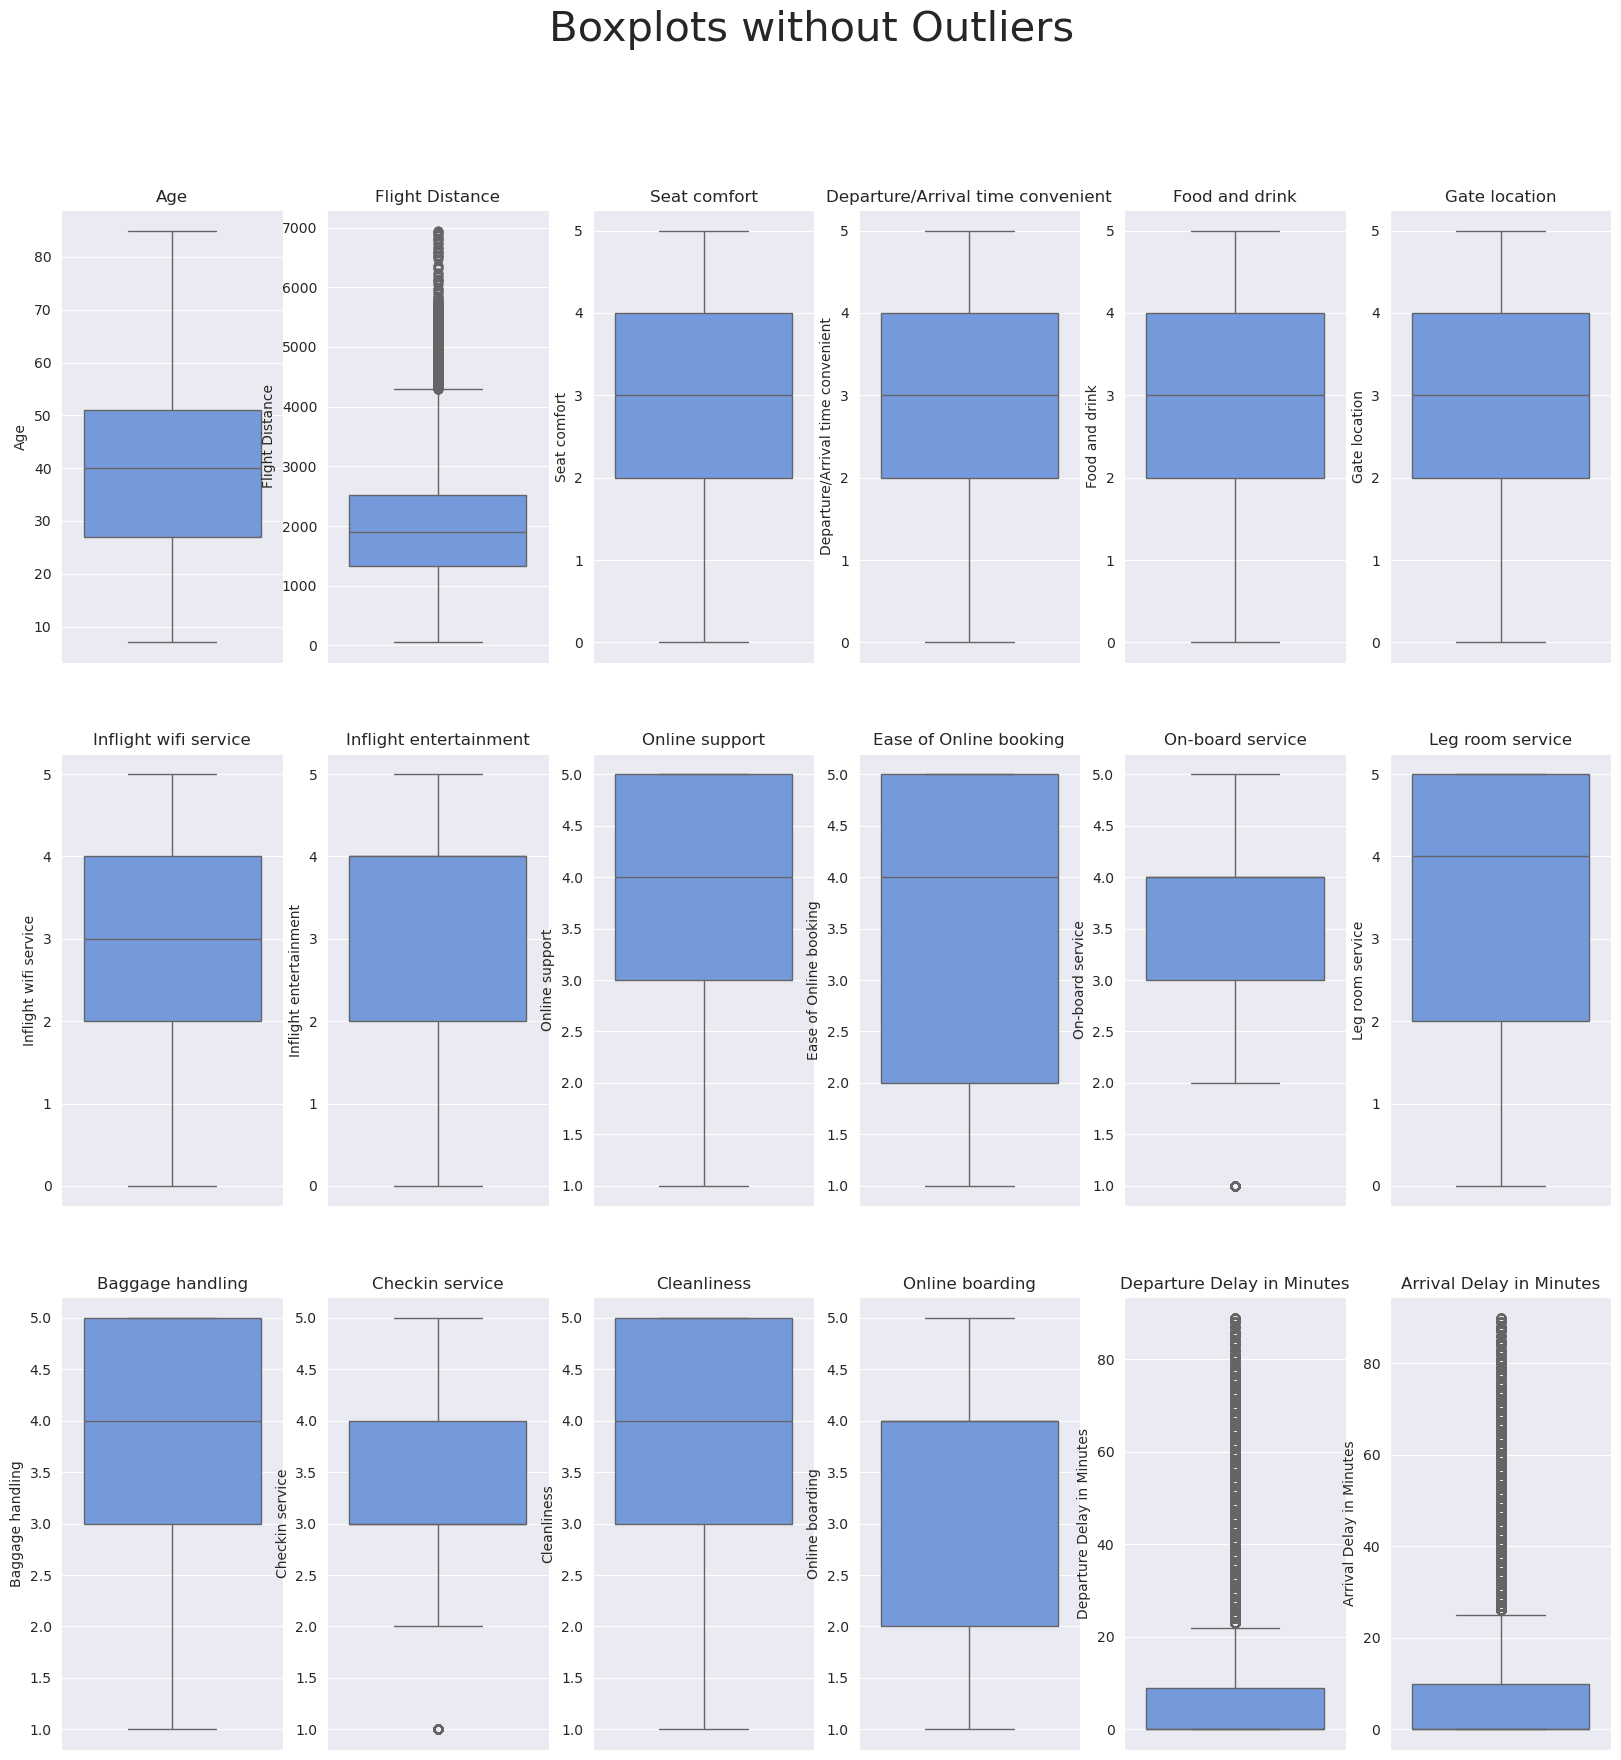

In [22]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(non_binary_columns):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(data=outliers_df[column], color='cornflowerblue')
    plt.title(column)

plt.suptitle('Boxplots without Outliers', size=30)
plt.show()

#### Finalizing Model Inputs

In [27]:
def finalize_inputs(df, keep_outliers=True, outlier_threshold=0.05):
    df = df.copy()

    # Train-test split
    train_df, test_df = train_test_split(df, train_size=0.7, shuffle=True, random_state=1)

    # Remove outliers
    if keep_outliers == False:
        train_df = remove_outliers(
            df = train_df,
            columns = [
                'On-board service',
                'Checkin service',
                'Departure Delay in Minutes',
                'Arrival Delay in Minutes',
                'Online boarding'
            ],
            threshold = outlier_threshold
    )

    # Split df into X and y
    y_train = train_df['satisfaction']
    y_test = test_df['satisfaction']
    X_train = train_df.drop('satisfaction', axis=1)
    X_test = test_df.drop('satisfaction', axis=1)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

    return X_train, X_test, y_train, y_test

### Training without Outlier Removal

In [28]:
X_train1, X_test1, y_train1, y_test1 = finalize_inputs(df, keep_outliers=True)

model1 = LogisticRegression()
model1.fit(X_train1, y_train1)

print("Test Accuracy: {:.3f}%".format(model1.score(X_test1, y_test1)*100))

Test Accuracy: 83.611%


### Training with Outlier Removal

In [32]:
X_train2, X_test2, y_train2, y_test2 = finalize_inputs(df, keep_outliers=False, outlier_threshold=0.05)

model2 = LogisticRegression()
model2.fit(X_train2, y_train2)

print("Test Accuracy: {:.3f}%".format(model1.score(X_test2, y_test2)*100))

4057 examples dropped.
Test Accuracy: 83.549%
